### Thomas Bremser 
- "On my honor, as a student, I have neither given nor received unauthorized aid on this academic work." 

In [47]:
# Import all packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
#import knn classifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn import svm
from sklearn.neural_network import MLPClassifier


#ensemble classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm

from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV 
from sklearn import metrics
from sklearn.metrics import roc_auc_score, auc

# feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

## Business and data understanding

* Problem statement & Business contexts: We want to use last years data to determine how many season ticket holders will want to renew their tickets for next year based off of last years data and by using a machine learning model like a decision tree model
* The significance of the problem: This problem is important becasue with the output created from our models the marketing team can focus on the customers that might not renew their season tickets and can maybe help push them into renewing their season tickets.
* Business value of the solution: The business value from this solution is that the marketing team can focus on the people that may not renew their tickets and maybe help those ticket holders experience for next year.

## Data processing of the previous season ticket holders

In [2]:
# Import training dataset
tick=pd.read_excel("train_test_dataset.xlsx")
tick.head()

,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,SPORT,COMP,PCTMARR,HOMEVAL
0,580V74KT,0,0,0,1,1,1,15,8,1,94,4,NaN,0,1,NaN,,77,203
1,298S54OK,1,0,0,1,0,1,15,3,1,,,NaN,0,0,NaN,1,53,68
2,268D25AO,1,1,0,0,0,1,15,11,1,67,2,NaN,0,1,0.0,,50,38
3,312Q12WV,1,1,0,1,0,1,15,4,0,62,4,,1,1,0.0,1,60,68
4,420R23VB,0,0,0,1,0,0,15,5,0,89,4,,1,1,0.0,,65,194


In [3]:
#Create new column to show ticket usage
tick['TICKETS_USED'] = tick['Y1G5'] + tick['Y1G4'] + tick['Y1G3'] + tick['Y1G2'] + tick['Y1G1']
tick.head(2)

,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,SPORT,COMP,PCTMARR,HOMEVAL,TICKETS_USED
0,580V74KT,0,0,0,1,1,1,15,8,1,94,4,NaN,0,1,NaN,,77,203,3
1,298S54OK,1,0,0,1,0,1,15,3,1,,,NaN,0,0,NaN,1,53,68,2


In [4]:
# Drop Extra columns
tick = tick.drop('FAKEID', axis=1)
tick = tick.drop('SPORT', axis=1)
tick = tick.drop('OWNHOME', axis=1)
tick = tick.drop('CHILD', axis=1)
tick = tick.drop('COMP', axis=1)
tick = tick.drop('PCTMARR', axis=1)

In [12]:
# transfering the data types so we can change them in the future
tick = tick.replace(r'/s+',np.nan, regex=True)

In [13]:
# Turn string values into integers
tick['AGE']= pd.to_numeric(tick['AGE'], errors='coerce')
tick['INCOME']= pd.to_numeric(tick['INCOME'], errors='coerce')
tick['GNDR']= pd.to_numeric(tick['GNDR'], errors='coerce')
tick.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9216 entries, 0 to 9215
Data columns (total 14 columns):
Y2defect        9216 non-null int64
Y1G5            9216 non-null int64
Y1G4            9216 non-null int64
Y1G3            9216 non-null int64
Y1G2            9216 non-null int64
Y1G1            9216 non-null int64
Y1price         9216 non-null int64
YEARS           9216 non-null int64
BACKER          9216 non-null int64
AGE             7223 non-null float64
INCOME          7272 non-null float64
GNDR            8718 non-null float64
HOMEVAL         9216 non-null int64
TICKETS_USED    9216 non-null int64
dtypes: float64(3), int64(11)
memory usage: 1008.1 KB


In [14]:
# Fill all NaN values with 0
tick.fillna('0')
tick.head()

,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,GNDR,HOMEVAL,TICKETS_USED
0,0,0,0,1,1,1,15,8,1,94.0,4.0,0.0,203,3
1,1,0,0,1,0,1,15,3,1,NaN,NaN,0.0,68,2
2,1,1,0,0,0,1,15,11,1,67.0,2.0,0.0,38,2
3,1,1,0,1,0,1,15,4,0,62.0,4.0,1.0,68,3
4,0,0,0,1,0,0,15,5,0,89.0,4.0,1.0,194,1


In [15]:
tick.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9216 entries, 0 to 9215
Data columns (total 14 columns):
Y2defect        9216 non-null int64
Y1G5            9216 non-null int64
Y1G4            9216 non-null int64
Y1G3            9216 non-null int64
Y1G2            9216 non-null int64
Y1G1            9216 non-null int64
Y1price         9216 non-null int64
YEARS           9216 non-null int64
BACKER          9216 non-null int64
AGE             7223 non-null float64
INCOME          7272 non-null float64
GNDR            8718 non-null float64
HOMEVAL         9216 non-null int64
TICKETS_USED    9216 non-null int64
dtypes: float64(3), int64(11)
memory usage: 1008.1 KB


In [17]:
# Quick Check to see what data is still missing
tick.isnull().sum()

Y2defect           0
Y1G5               0
Y1G4               0
Y1G3               0
Y1G2               0
Y1G1               0
Y1price            0
YEARS              0
BACKER             0
AGE             1993
INCOME          1944
GNDR             498
HOMEVAL            0
TICKETS_USED       0
dtype: int64

In [18]:
# Describe dataset to discover the mean of the columns that have missing values
tick.describe()

,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,GNDR,HOMEVAL,TICKETS_USED
count,9216.000000,9216.000000,9216.000000,9216.000000,9216.000000,9216.000000,9216.000000,9216.000000,9216.000000,7223.000000,7272.000000,8718.000000,9216.000000,9216.000000
mean,0.500000,0.337023,0.510525,0.636719,0.291124,0.480252,19.963108,6.378038,0.489475,61.392912,2.882151,0.447236,112.111220,2.255642
std,0.500027,0.472718,0.499916,0.480971,0.454305,0.499637,8.820188,2.873927,0.499916,16.594747,1.843857,0.497237,92.292223,1.054032
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,2.000000,0.000000,12.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,4.000000,0.000000,48.000000,1.000000,0.000000,56.000000,1.000000
50%,0.500000,0.000000,1.000000,1.000000,0.000000,0.000000,15.000000,6.000000,0.000000,63.000000,3.000000,0.000000,81.000000,2.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,25.000000,9.000000,1.000000,75.000000,4.000000,1.000000,132.000000,3.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,50.000000,24.000000,1.000000,97.000000,6.000000,1.000000,600.000000,5.000000


In [19]:
# Fill the missing values
tick['AGE'].mean()
tick= tick.fillna({'AGE': 61.3929})
tick= tick.fillna({'INCOME': 3})

In [20]:
# Drop all other values
tick = tick.dropna()
tick.head()

,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,GNDR,HOMEVAL,TICKETS_USED
0,0,0,0,1,1,1,15,8,1,94.0000,4.0,0.0,203,3
1,1,0,0,1,0,1,15,3,1,61.3929,3.0,0.0,68,2
2,1,1,0,0,0,1,15,11,1,67.0000,2.0,0.0,38,2
3,1,1,0,1,0,1,15,4,0,62.0000,4.0,1.0,68,3
4,0,0,0,1,0,0,15,5,0,89.0000,4.0,1.0,194,1


In [21]:
tick.isnull().sum()

Y2defect        0
Y1G5            0
Y1G4            0
Y1G3            0
Y1G2            0
Y1G1            0
Y1price         0
YEARS           0
BACKER          0
AGE             0
INCOME          0
GNDR            0
HOMEVAL         0
TICKETS_USED    0
dtype: int64

In [22]:
tick.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8718 entries, 0 to 9215
Data columns (total 14 columns):
Y2defect        8718 non-null int64
Y1G5            8718 non-null int64
Y1G4            8718 non-null int64
Y1G3            8718 non-null int64
Y1G2            8718 non-null int64
Y1G1            8718 non-null int64
Y1price         8718 non-null int64
YEARS           8718 non-null int64
BACKER          8718 non-null int64
AGE             8718 non-null float64
INCOME          8718 non-null float64
GNDR            8718 non-null float64
HOMEVAL         8718 non-null int64
TICKETS_USED    8718 non-null int64
dtypes: float64(3), int64(11)
memory usage: 1021.6 KB


In [23]:
# Quick Correlation Check to see what variables affect renewal of tickets the most
tick.corr()

,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,GNDR,HOMEVAL,TICKETS_USED
Y2defect,1.000000,-0.104053,0.028023,-0.036011,-0.110535,-0.144913,-0.021593,-0.140321,-0.189366,-0.021125,0.010452,0.008438,0.031737,-0.166122
Y1G5,-0.104053,1.000000,0.090870,-0.151624,0.113242,0.122065,0.041598,0.123376,0.047036,0.031552,0.001043,-0.008892,0.002908,0.529669
Y1G4,0.028023,0.090870,1.000000,-0.080509,-0.073067,-0.093543,-0.003770,-0.089599,-0.088774,-0.063695,0.006849,-0.002689,0.002141,0.402683
Y1G3,-0.036011,-0.151624,-0.080509,1.000000,-0.090708,-0.137456,-0.047423,-0.099819,0.006247,-0.027674,0.019158,-0.001742,0.003211,0.245697
Y1G2,-0.110535,0.113242,-0.073067,-0.090708,1.000000,0.207887,0.060402,0.320920,0.277685,0.096592,-0.011293,-0.005443,-0.015342,0.503490
Y1G1,-0.144913,0.122065,-0.093543,-0.137456,0.207887,1.000000,-0.003844,0.245281,0.259089,0.086442,-0.028331,-0.026223,-0.012690,0.511318
Y1price,-0.021593,0.041598,-0.003770,-0.047423,0.060402,-0.003844,1.000000,0.043650,-0.088352,-0.031509,0.068938,0.045249,0.091856,0.019418
YEARS,-0.140321,0.123376,-0.089599,-0.099819,0.320920,0.245281,0.043650,1.000000,0.532929,0.286359,-0.088194,-0.013408,-0.047321,0.221704
BACKER,-0.189366,0.047036,-0.088774,0.006247,0.277685,0.259089,-0.088352,0.532929,1.000000,0.181033,-0.085729,-0.024022,-0.065270,0.224144
AGE,-0.021125,0.031552,-0.063695,-0.027674,0.096592,0.086442,-0.031509,0.286359,0.181033,1.000000,-0.219483,0.019336,-0.010546,0.053863


## Data Visualization

In [35]:
# Create a pivot table to show who defects.
tick.groupby(['Y2defect']).count()

,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,GNDR,HOMEVAL,TICKETS_USED
Y2defect,,,,,,,,,,,,,
0,4363,4363,4363,4363,4363,4363,4363,4363,4363,4363,4363,4363,4363
1,4355,4355,4355,4355,4355,4355,4355,4355,4355,4355,4355,4355,4355


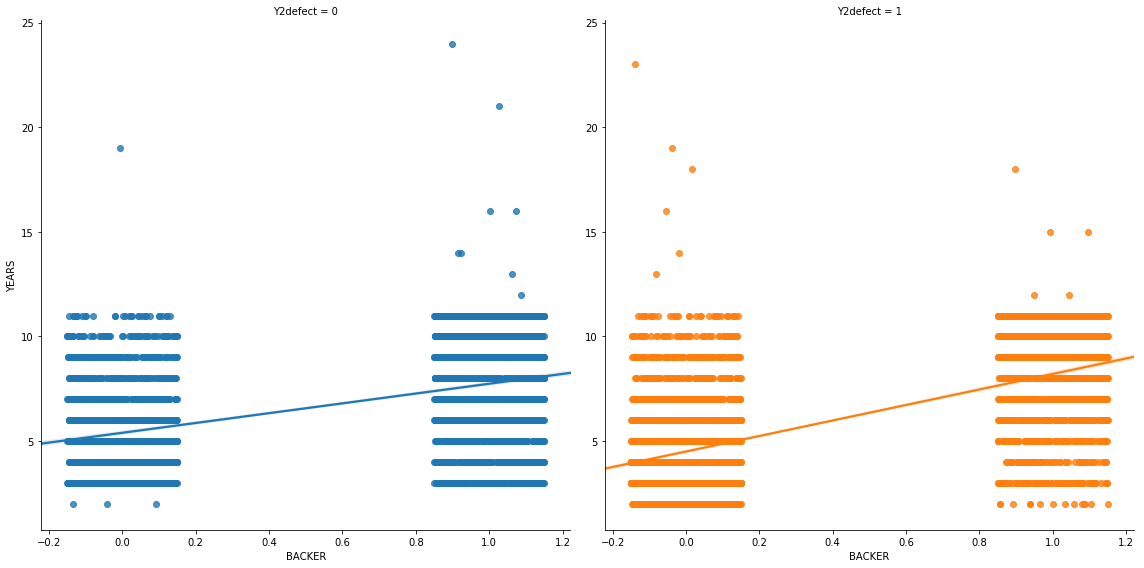

In [41]:
# create an lmplot to show how backers and years affect Y2defect
sns.lmplot("BACKER", "YEARS", tick, col="Y2defect", hue='Y2defect', x_jitter=.15, size=8)

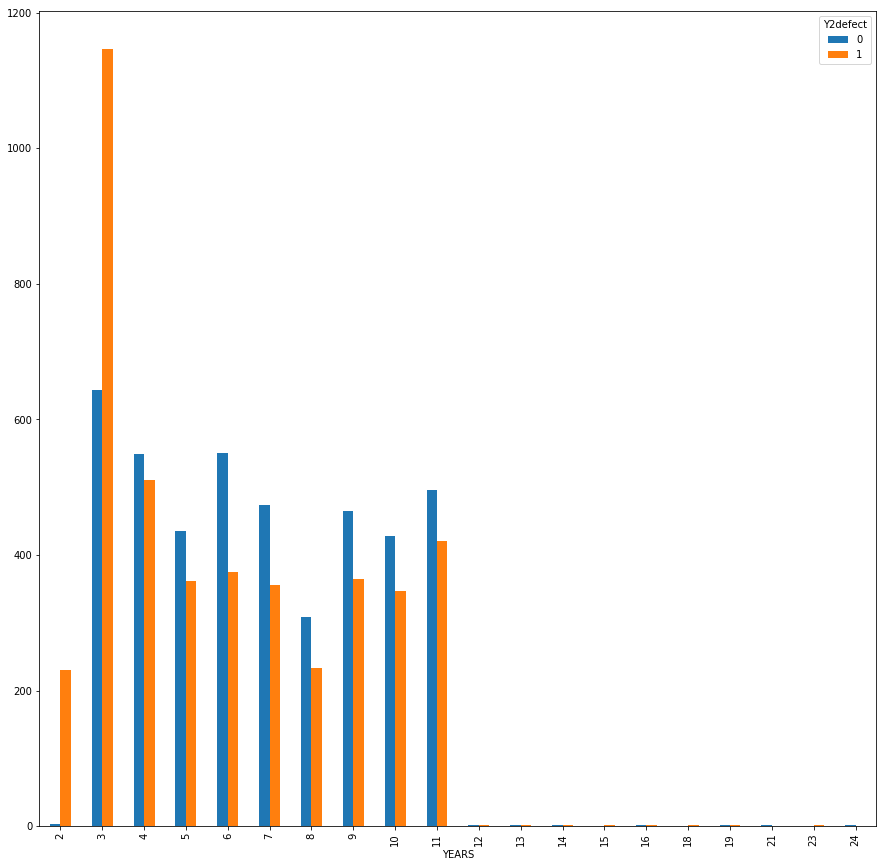

In [44]:
# Create a bar graph to show who defects when
tick.groupby(['YEARS', 'Y2defect']).size().unstack().plot(kind='bar', figsize=[15,15])

* The bar graph above shows that the longer someone has season tickets the less likely they are to defect on renewing next seasons tickets.

## Exploratory data analysis 

In [36]:
# Create a Correlation analysis
tick.corr()

,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,GNDR,HOMEVAL,TICKETS_USED
Y2defect,1.000000,-0.104053,0.028023,-0.036011,-0.110535,-0.144913,-0.021593,-0.140321,-0.189366,-0.021125,0.010452,0.008438,0.031737,-0.166122
Y1G5,-0.104053,1.000000,0.090870,-0.151624,0.113242,0.122065,0.041598,0.123376,0.047036,0.031552,0.001043,-0.008892,0.002908,0.529669
Y1G4,0.028023,0.090870,1.000000,-0.080509,-0.073067,-0.093543,-0.003770,-0.089599,-0.088774,-0.063695,0.006849,-0.002689,0.002141,0.402683
Y1G3,-0.036011,-0.151624,-0.080509,1.000000,-0.090708,-0.137456,-0.047423,-0.099819,0.006247,-0.027674,0.019158,-0.001742,0.003211,0.245697
Y1G2,-0.110535,0.113242,-0.073067,-0.090708,1.000000,0.207887,0.060402,0.320920,0.277685,0.096592,-0.011293,-0.005443,-0.015342,0.503490
Y1G1,-0.144913,0.122065,-0.093543,-0.137456,0.207887,1.000000,-0.003844,0.245281,0.259089,0.086442,-0.028331,-0.026223,-0.012690,0.511318
Y1price,-0.021593,0.041598,-0.003770,-0.047423,0.060402,-0.003844,1.000000,0.043650,-0.088352,-0.031509,0.068938,0.045249,0.091856,0.019418
YEARS,-0.140321,0.123376,-0.089599,-0.099819,0.320920,0.245281,0.043650,1.000000,0.532929,0.286359,-0.088194,-0.013408,-0.047321,0.221704
BACKER,-0.189366,0.047036,-0.088774,0.006247,0.277685,0.259089,-0.088352,0.532929,1.000000,0.181033,-0.085729,-0.024022,-0.065270,0.224144
AGE,-0.021125,0.031552,-0.063695,-0.027674,0.096592,0.086442,-0.031509,0.286359,0.181033,1.000000,-0.219483,0.019336,-0.010546,0.053863


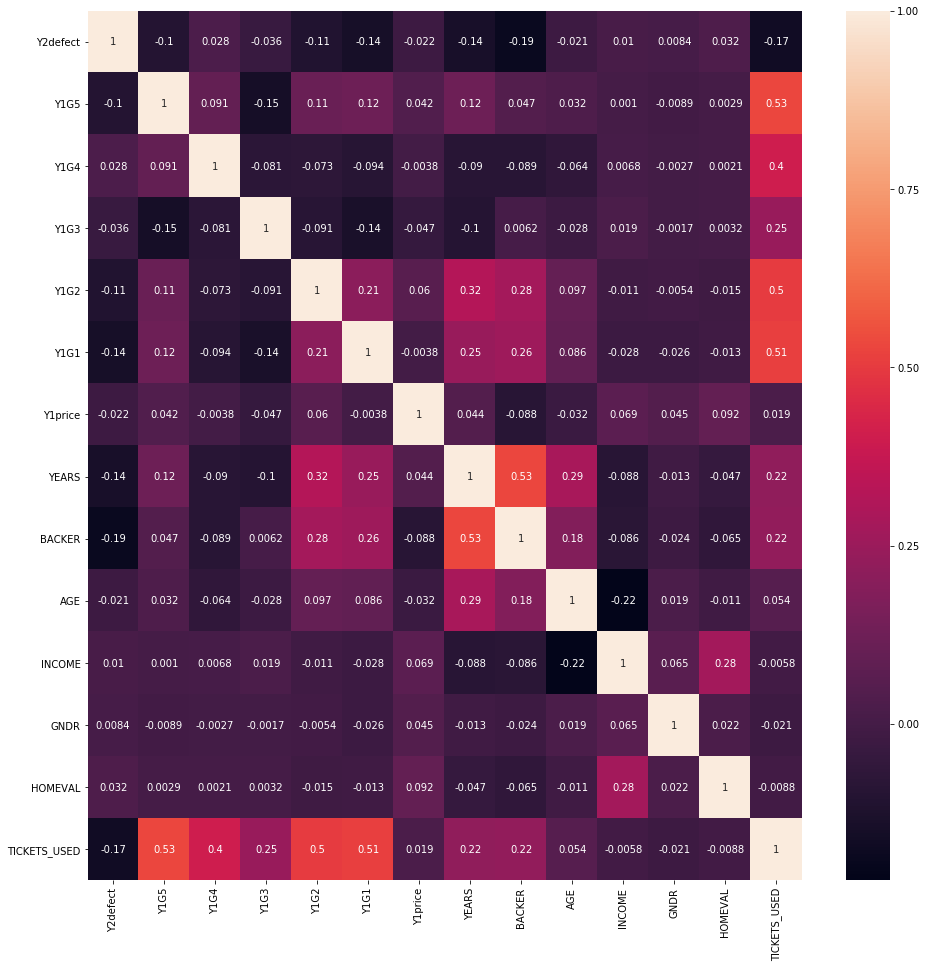

In [37]:
# Create a heat map to show the correlations
plt.figure(figsize=(16,16))
sns.heatmap(tick.corr(), annot=True)

* The heat map above shows that years and backers are highly correlated
* It also shows that ticket_used, Backer, years, Y1G1, Y1G2 are highly negativly correlated to Y2defect.

### two sample hypothesis test
* Being a ticket holder for many years will not have an affect on wether you will defect on next years season tickets.

In [48]:
defect = tick[tick['Y2defect'] == 0]['YEARS']
no_defect = tick[tick['Y2defect'] == 1]['YEARS']
stats.ttest_ind(defect, no_defect)

Ttest_indResult(statistic=13.231229008452674, pvalue=1.3930470865888093e-39)

In [50]:
defect_aff = stats.ttest_ind(defect, no_defect)
print "The t-statistic is %.3f and the p-value is %.3f." % defect_aff

The t-statistic is 13.231 and the p-value is 0.000.


* since we have a low p-value we reject the null hypothsis meaning the number of years you hold season tickets does affect wether you will defect on your season tickets or not.
* there is a statistical difference between these two variables

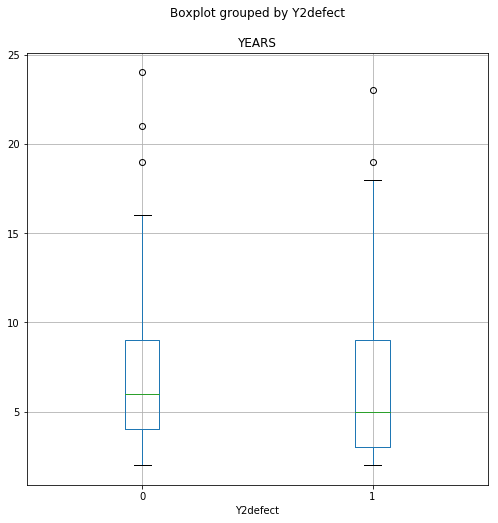

In [52]:
# create a boxplot to help visulize the difference
tick.boxplot('YEARS', by='Y2defect', figsize=(8, 8))

# Model Development / Building

### Decision tree model

In [24]:
# determine the X and y values to create a decision tree
y = tick['Y2defect']
X = tick[['TICKETS_USED', 'BACKER', 'Y1price', 'YEARS']]

In [25]:
# Create test training variable sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [26]:
# Run the decision tree modal
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [27]:
# Print the metrics 
print metrics.accuracy_score(y_test, dt.predict(X_test))
print metrics.confusion_matrix(y_test, dt.predict(X_test))
print metrics.classification_report(y_test, dt.predict(X_test))
print metrics.roc_auc_score(y_test, dt.predict(X_test))

0.6123853211009175
[[897 403]
 [611 705]]
             precision    recall  f1-score   support

          0       0.59      0.69      0.64      1300
          1       0.64      0.54      0.58      1316

avg / total       0.62      0.61      0.61      2616

0.6128571428571428


### Random Forest Model

In [ ]:
# Create a random forest model
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10)    
rf=rf.fit(X, y)
rf.score(X, y)

### Feature selection

In [ ]:
# Create a feature selection modal
y1 = tick['Y2defect']
X1 = tick.drop(['Y2defect'],axis=1)

In [ ]:
# import scikit-plot
import scikitplot as skplt

In [ ]:
# find the five important variables using feature selection
X_new = SelectKBest(chi2, k=3).fit_transform(X1, y1)
print X_new

####  Three important variables
1. YEARS
2. BACKER
3. HOMEVAL


In [ ]:
# evaluate the model by splitting into train (70%) and test sets (30%)
X1_train, X1_test, y1_train, y1_test = train_test_split(X_new, y1, test_size=0.3, random_state=0)
#model2 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3,min_samples_leaf=5)
fs = tree.DecisionTreeClassifier()
fs.fit(X1_train, y1_train)

#Model evaluation
print metrics.accuracy_score(y1_test, fs.predict(X1_test))
print metrics.confusion_matrix(y1_test, fs.predict(X1_test)) 
print metrics.classification_report(y1_test, fs.predict(X1_test))
print metrics.roc_auc_score(y1_test, fs.predict(X1_test))

### 10-fold cross validation

In [65]:
# evaluate the logit model using 10-fold cross-validation
scores = cross_val_score(dt, X, y, scoring='accuracy', cv=10)
print scores
print scores.mean()

[0.60137457 0.60366552 0.6093929  0.59633028 0.58142202 0.61538462
 0.61079219 0.60275545 0.61079219 0.60619977]
0.6038109508297407


* Based on my 10 fold cross validation my model is only 60.38% correct.

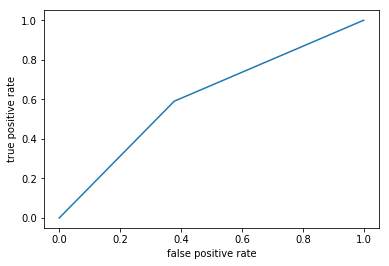

False-positive rate: [0.         0.37769231 1.        ]
True-positive rate:  [0.         0.59042553 1.        ]
AUC score:  0.606366612111293


In [70]:
# Create a model to develop a AUC score to determine how accurate my model is
y2 = tick['Y2defect']
X2 = tick.drop(['Y2defect'], axis=1)

# evaluate the model by splitting into train (70%) and test sets (30%)
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.3, random_state=0)
lr = LogisticRegression()
lr.fit(X_train, y_train)

#This is ROC chart based on the testing dataset

fpr, tpr, thresholds = metrics.roc_curve(y_test,lr.predict(X_test))
plt.subplot()
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.plot(fpr, tpr)
plt.show()

print "False-positive rate:", fpr
print "True-positive rate: ", tpr
print "AUC score: ", metrics.roc_auc_score(y_test, lr.predict(X_test))

* After creting my AUC score we see that model is 60.63% accurate.

### Best Model for the client

* After running three different models to find the best accuracy I am going to go with my random forest model with a 63.38% accuracy

## Model Deployment & Prepare Entry Data

In [28]:
# Import the validation data set
tick2 = pd.read_excel("validation_dataset.xlsx")
tick2.head()

,FAKEID,Y3defect,Y2G5,Y2G4,Y2G3,Y2G2,Y2G1,Y2price,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,SPORT,COMP,PCTMARR,HOMEVAL
0,580D24RR,NaN,0,0,1,1,0,15,5,0,49.0,4,NaN,0,1,0.0,,66,64
1,179Q96NO,NaN,1,1,1,1,1,25,9,1,84.0,5,,0,,0.0,,67,128
2,050Z45TB,NaN,1,0,1,1,0,15,5,1,NaN,,NaN,0,0,NaN,1,52,113
3,399V18KY,NaN,0,0,1,1,0,15,1,0,34.0,4,1,0,1,NaN,,65,81
4,009A52KP,NaN,0,1,0,1,0,25,9,1,59.0,4,NaN,1,1,0.0,,65,110


In [29]:
# Rename Y2price to Y1 price to create data normality 
tick2 = tick2.rename(columns={'Y2price': 'Y1price'})
tick2.head(2)

,FAKEID,Y3defect,Y2G5,Y2G4,Y2G3,Y2G2,Y2G1,Y1price,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,SPORT,COMP,PCTMARR,HOMEVAL
0,580D24RR,NaN,0,0,1,1,0,15,5,0,49.0,4,NaN,0,1,0.0,,66,64
1,179Q96NO,NaN,1,1,1,1,1,25,9,1,84.0,5,,0,,0.0,,67,128


In [30]:
# Combine the number of tickets used for each game
tick2['TICKETS_USED'] = tick['Y1G5'] + tick['Y1G4'] + tick['Y1G3'] + tick['Y1G2'] + tick['Y1G1']
tick2.head(2)

,FAKEID,Y3defect,Y2G5,Y2G4,Y2G3,Y2G2,Y2G1,Y1price,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,SPORT,COMP,PCTMARR,HOMEVAL,TICKETS_USED
0,580D24RR,NaN,0,0,1,1,0,15,5,0,49.0,4,NaN,0,1,0.0,,66,64,3.0
1,179Q96NO,NaN,1,1,1,1,1,25,9,1,84.0,5,,0,,0.0,,67,128,2.0


In [31]:
# quick check to see if al the data is the same
validation = tick2[['TICKETS_USED', 'BACKER', 'Y1price', 'YEARS']]
validation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9542 entries, 0 to 9541
Data columns (total 4 columns):
TICKETS_USED    8718 non-null float64
BACKER          9542 non-null int64
Y1price         9542 non-null int64
YEARS           9542 non-null int64
dtypes: float64(1), int64(3)
memory usage: 298.3 KB


In [32]:
# fill in the missing values with the average number of tickets used
validation = validation.fillna({'TICKETS_USED': 2})
validation.head()

,TICKETS_USED,BACKER,Y1price,YEARS
0,3.0,0,15,5
1,2.0,1,25,9
2,2.0,1,15,5
3,3.0,0,15,1
4,1.0,1,25,9


In [33]:
validation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9542 entries, 0 to 9541
Data columns (total 4 columns):
TICKETS_USED    9542 non-null float64
BACKER          9542 non-null int64
Y1price         9542 non-null int64
YEARS           9542 non-null int64
dtypes: float64(1), int64(3)
memory usage: 298.3 KB


In [439]:
fakeid = pd.DataFrame(tick2['FAKEID'])
fakeid.head()

,FAKEID
0,580D24RR
1,179Q96NO
2,050Z45TB
3,399V18KY
4,009A52KP


In [441]:
# applying the decision tree model to validation dataset
output_scoring = dt.predict(validation)

# generating probability for defect for each fan
probs = dt.predict_proba(validation)
probs = pd.DataFrame(probs, columns=['prob of Renewal', 'prob of Defect'])

# joining two dataframes (fakeid and probability)
risky_fans = fakeid.join(probs)

# joining dataframes (fakeid, probability, and prediction)
predicted_y= pd.DataFrame(output_scoring, columns=['Predicted Defect'])
risky_fans = risky_fans.join(predicted_y)

# generating submission file
risky_fans.to_csv("submissionentry2.csv", index=False)

output_scoring

* 0 =Will renew
* 1= Will not renew

## Final analysis 

* Conclusions 
    - In conclusion determine an accurate model was hard to obtain based on the data that we were given but with that being said I was able to come up with a couple of models that showed 60% accuracy as to wether someone will defect on next years seasons tickets.
    - These models also showed what variables to focus the marketing teams time on which are Backers, years, tickets_used and income. My feature selection model also showed that Homeval could be an important variable to look at.
    - If the Kansas State Athletic department focuses on these areas they should be able to communicate to the people who may not renew their season tickets and do some targeting advertising.